The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

In [ ]:
import tensorflow

In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import numpy as np
import pandas as pd


In [ ]:
(x_train , y_train),(x_test , y_test) = cifar10.load_data()
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

170498071/170498071 [==============================] - 3s 0us/step


In [ ]:
y_train = to_categorical(y_train , 10)
y_test = to_categorical(y_test , 10)
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [ ]:
import matplotlib.pyplot as plt


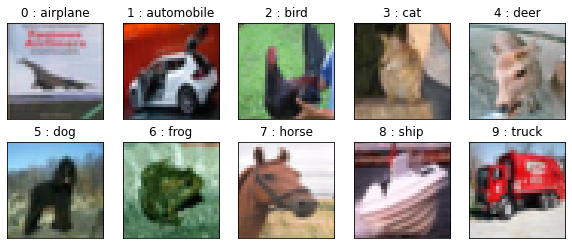

In [ ]:
(_ , _),(_,labels) = cifar10.load_data()
idx = [3 , 6 , 25 , 46 , 58 , 85 , 93 , 99 , 108 , 133]
clsmap = {
    0:'airplane' , 
    1:'automobile' , 
    2:'bird' , 
    3:'cat' , 
    4:'deer' , 
    5:'dog' , 
    6:'frog' , 
    7:'horse' , 
    8:'ship' , 
    9:'truck'
}


plt.figure(figsize=(10,4))

for i , (img , y) in enumerate(zip(x_test[idx].reshape(10 , 32 , 32 , 3) , labels[idx])):
  plt.subplot(2,5,i+1)
  plt.imshow(img , cmap='gray')
  plt.xticks([])
  plt.yticks([])
  plt.title(str(y[0]) + " : "  + clsmap[y[0]])
plt.show()

In [ ]:
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Flatten
from tensorflow.keras.layers import Input , Dense , Dropout , BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop

## Dimensionality of input and latent encoded representation

input_dim = (32 , 32 , 3)
input_img = Input(shape=input_dim)


## Convolutional layer
c11 = Conv2D(64 , (9,9) , strides=(2,2) , input_shape = input_dim , activation='relu')(input_img)

## Pooling and Batch Normalization

p12 = MaxPooling2D(pool_size=(2,2))(c11)
bn13 = BatchNormalization()(p12)


## Second Convolutional layer
c14 = Conv2D(128 , (3,3) , strides=(1,1) , activation='relu')(bn13)
p15 = MaxPooling2D(pool_size=(2,2))(c14)
bn16 = BatchNormalization()(p15)


## Flatten for compability
f17 = Flatten()(bn16)

## Dense layer + Dropout
do18 = Dropout(0.5)(f17)
d19 = Dense(units = 256 , activation = 'relu')(do18)
do110 = Dropout(0.2)(d19)
d111 = Dense(units = 64 , activation = 'relu')(do110)
do112 =  Dropout(0.1)(d111)


output = Dense(units = 10 , activation = 'sigmoid')(do112)



classifier = Model(input_img , output)





In [ ]:
opt = RMSprop(learning_rate=0.001)
classifier.compile(optimizer = opt , loss='binary_crossentropy' , metrics=['accuracy'])
print(classifier.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 12, 12, 64)        15616     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 6, 6, 64)         0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 6, 6, 64)         256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 2, 2, 128)        0     

In [ ]:
 from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping
 

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss' , factor=0.5 , patience=10 , min_delta=1e-4 , mode='min' , verbose=1)
stop_alg = EarlyStopping(monitor='val_loss' , patience=35 , restore_best_weights=True , mode='min' , verbose=1)
hist = classifier.fit(x_train , y_train , batch_size=100 , epochs = 1000 , callbacks=[stop_alg , reduce_lr] , shuffle=True , validation_data = (x_test , y_test))
classifier.save_weights('cnn.hdf5')

Epoch 1/1000
500/500 [==============================] - 45s 85ms/step - loss: 0.2797 - accuracy: 0.3488 - val_loss: 0.2833 - val_accuracy: 0.3442 - lr: 0.0010
Epoch 2/1000
500/500 [==============================] - 41s 83ms/step - loss: 0.2290 - accuracy: 0.4711 - val_loss: 0.2169 - val_accuracy: 0.4930 - lr: 0.0010
Epoch 3/1000
500/500 [==============================] - 45s 91ms/step - loss: 0.2110 - accuracy: 0.5207 - val_loss: 0.2373 - val_accuracy: 0.4618 - lr: 0.0010
Epoch 4/1000
500/500 [==============================] - 42s 84ms/step - loss: 0.2003 - accuracy: 0.5505 - val_loss: 0.2204 - val_accuracy: 0.4810 - lr: 0.0010
Epoch 5/1000
500/500 [==============================] - 42s 83ms/step - loss: 0.1912 - accuracy: 0.5767 - val_loss: 0.2225 - val_accuracy: 0.4883 - lr: 0.0010
Epoch 6/1000
500/500 [==============================] - 42s 84ms/step - loss: 0.1839 - accuracy: 0.5964 - val_loss: 0.2251 - val_accuracy: 0.5070 - lr: 0.0010
Epoch 7/1000
500/500 [========================

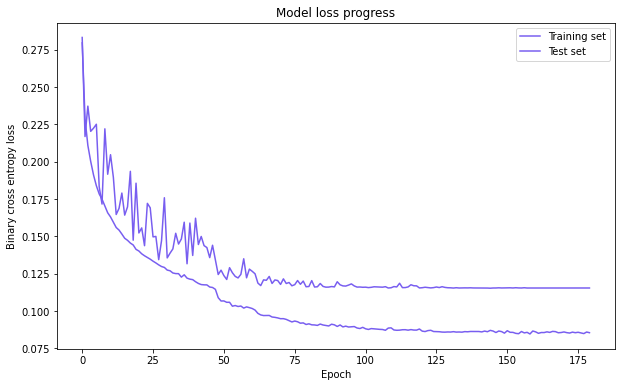

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10 , 6))
plt.plot(hist.history['loss'] , color='#785ef0')
plt.plot(hist.history['val_loss'] , color='#785ef0')
plt.title('Model loss progress')
plt.xlabel('Epoch')
plt.ylabel('Binary cross entropy loss')
plt.legend(['Training set' , 'Test set'] , loc='upper right')
plt.show()

In [ ]:
from sklearn.metrics import classification_report , confusion_matrix , balanced_accuracy_score

In [ ]:
(_ , _) , (_ , labels) = cifar10.load_data()
y_ = labels
y_hat = classifier.predict(x_test)
y_pred = np.argmax(y_hat , axis=1)

print(classification_report(np.argmax(y_test , axis=1) , np.argmax(y_hat , axis=1) , labels=[0,1,2,3,4,5,6,7,8,9]))

cm = confusion_matrix(np.argmax(y_test , axis=1) , np.argmax(y_hat , axis=1) , labels=[0,1,2,3,4,5,6,7,8,9])

ber = 1 - balanced_accuracy_score(np.argmax(y_test , axis=1) , np.argmax(y_hat , axis=1))

print('Ber' , ber)

313/313 [==============================] - 3s 9ms/step
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1000
           1       0.87      0.84      0.86      1000
           2       0.70      0.69      0.70      1000
           3       0.58      0.59      0.58      1000
           4       0.73      0.73      0.73      1000
           5       0.69      0.66      0.67      1000
           6       0.83      0.85      0.84      1000
           7       0.80      0.80      0.80      1000
           8       0.85      0.87      0.86      1000
           9       0.82      0.83      0.82      1000

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.77      0.77      0.77     10000

Ber 0.23270000000000002
